In [1]:
%%capture
! pip install seaborn

In [2]:
!conda upgrade -y scikit-learn

Solving environment: ...working... 

Updating scikit-learn is constricted by 

anaconda -> requires scikit-learn==0.23.2=py38h47e9c7a_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

# All requested packages already installed.



In [3]:
!conda install -y bokeh

Solving environment: ...working... done

# All requested packages already installed.



In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy import stats
%matplotlib inline

In [5]:
admission = pd.read_csv("./data/binary.csv")
admission.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


### Inspecting the data

In [6]:
#looking at the data type
print(admission.dtypes)

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object


In [7]:
#checking for missing values
admission.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

This data set has been downloaded from a Kaggle competition, so a minimun of cleanning has been already performed

In [8]:
#looking at the number of rows and column
admission.shape

(400, 4)

In [9]:
#info about the data
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


### Descriptive Statistical Analysis

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

- the count of that variable
- the mean
- the standard deviation (std)
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value
---
Below is the descriptive study for this project

In [11]:
admission.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


### Analyzing Individual Feature Patterns by visualizing relationshipU

Looking at the correlation analysis
Correlation: a measure of the extent of interdependence between variables.
- 1: Total positive linear correlation.
- 0: No linear correlation, the two variables most likely do not affect each other.
- 1: Total negative linear correlation

In [12]:
admission.corr()

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


### First observation

- GRE Score, TOEFL Score, University Rating, GGPA have the strongest scores. There might a strong relationship between admission and these variables.

#### But let us took a closer look.

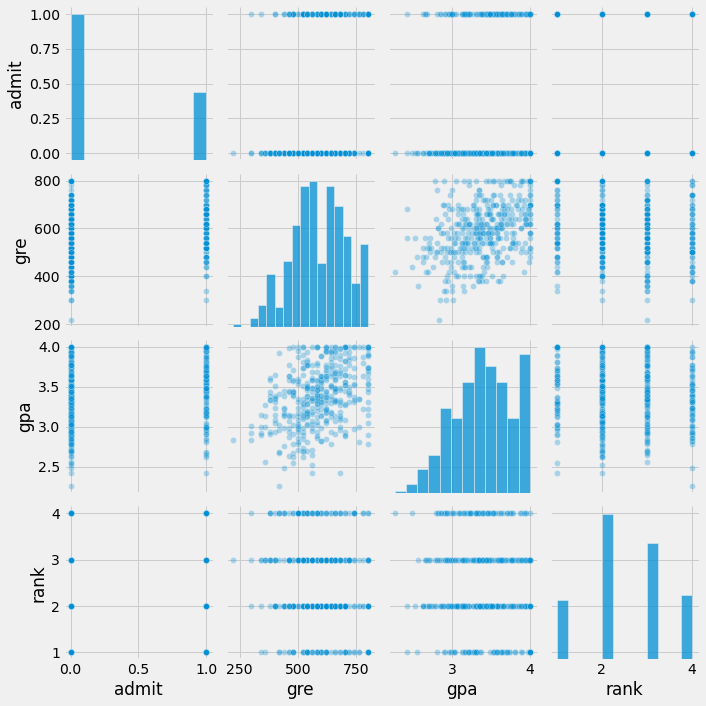

In [30]:
g = sns.pairplot(admission, plot_kws={"alpha": .3})

### Race to Predicting admission at Graduate college

<AxesSubplot:>

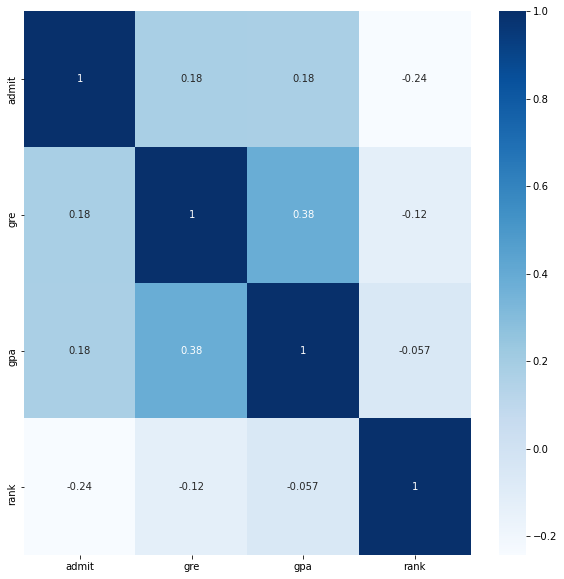

In [15]:
#Looking closer at the relationship between variables by plotting a scatter plot
plt.figure(figsize = (10,10))
sns.heatmap(admission.corr(),annot=True, cmap='Blues')

#### Distribution of the variables

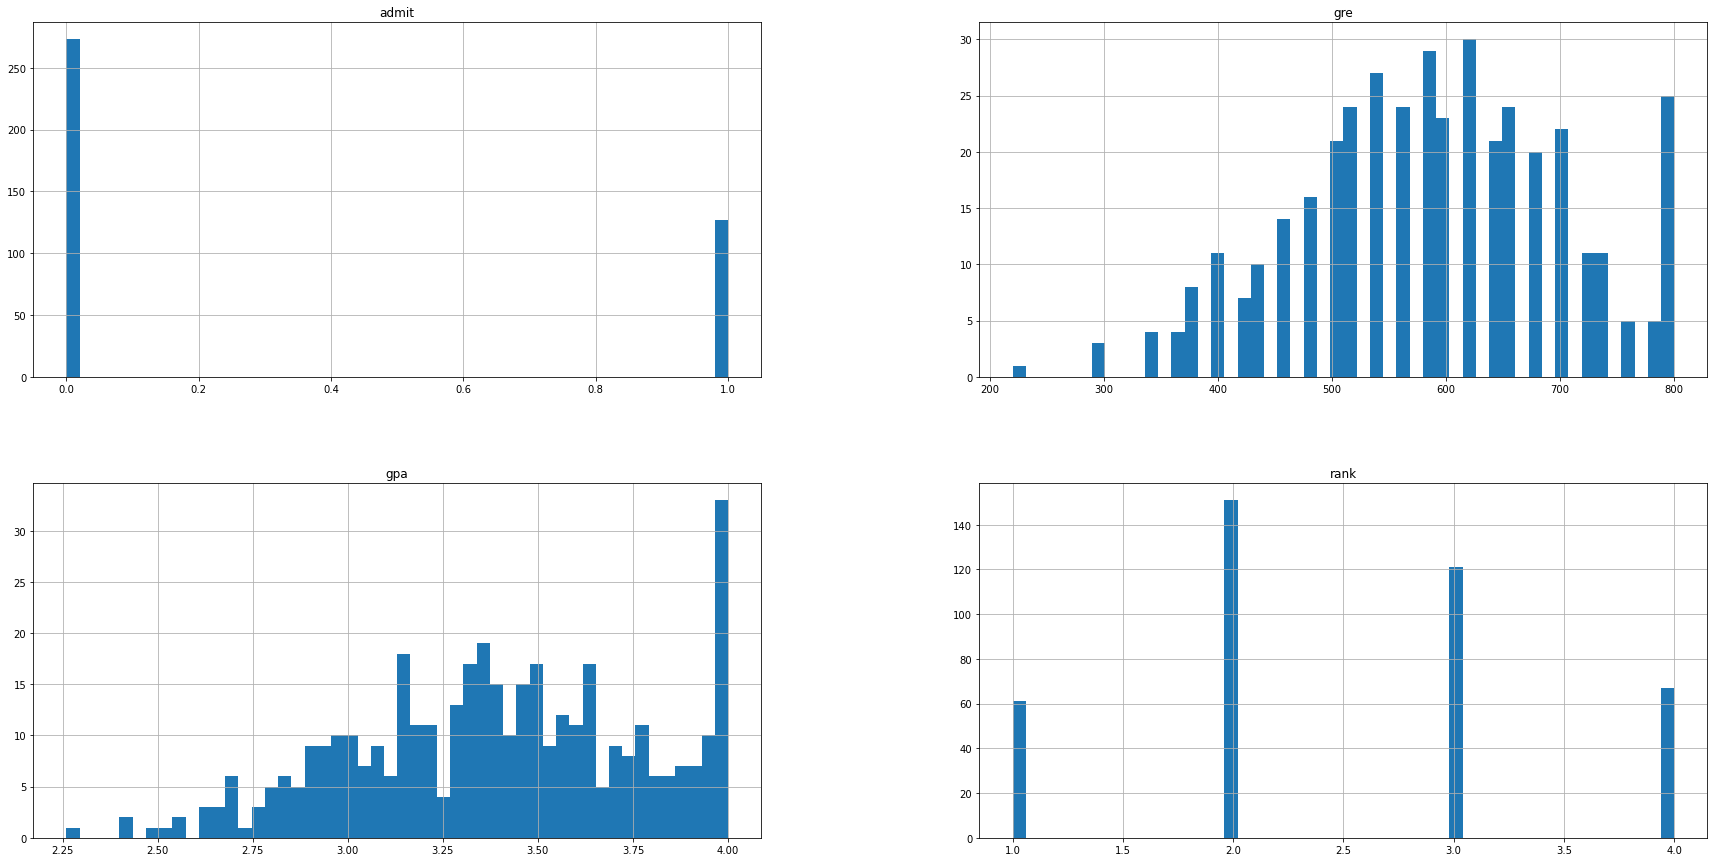

In [16]:
#Looking closer at the distribution of each single variable by plotting an histogram
admission.hist(bins=50, figsize=(30,15))
plt.savefig("distribution of columns")
plt.show()

We can see here that the following variables are approximately normally distributed
- University, GRE Score, TOELF Score, LOR,GGPA
The following variables are approximately skewed to the left:
- Chance of Admit, LOR
- Research, Serial No seem to be not normally distributed

# Modelling Development

## Multiple Logistic Regression Analysis

In [17]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn import utils
from model_inspector.inspect import plot_2d_regression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
plt.style.use("fivethirtyeight")

In [18]:
#split data into features and target variables
target_col = "admit"
X = admission.drop(columns=[target_col])
y = admission.loc[:, target_col]

# Set aside 25% of the data for testing the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Import a model class
from sklearn.linear_model import LogisticRegression

# Create a model from that class
lr = LogisticRegression()

# Ask the model to learn a function that predicts `y` from `X`
lr.fit(X_train, y_train)

LogisticRegression()

In [19]:
#printing the scores of model accuracy on both the training and test
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

0.725
0.7035714285714286


In [20]:
#Comparing this score to the score a null model would get on this problem
y_test.value_counts(normalize=True)

0    0.675
1    0.325
Name: admit, dtype: float64

### Computing the metrics for evaluating the models

In [21]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
y_pred = lr.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.725
Precision Score : 0.8
Recall Score : 0.20512820512820512
F1 Score : 0.326530612244898


The acuracy model is 72.5%

## Random Forest Classification Analysis

In [22]:
#split data into features and target variables
target_col = "admit"
X = admission.drop(columns=[target_col])
y = admission.loc[:, target_col]

# Set aside 25% of the data for testing the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Import a model class, create, and learn 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [23]:
#computing the R square score
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9892857142857143
0.6583333333333333


In [24]:
#Comparing this score to the score a null model would get on this problem
y_test.value_counts(normalize=True)

0    0.633333
1    0.366667
Name: admit, dtype: float64

### Computing the metrics for evaluating the models

In [25]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
y_pred = rfc.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.6583333333333333
Precision Score : 0.5555555555555556
Recall Score : 0.3409090909090909
F1 Score : 0.4225352112676057


The accuracy score is 64%

## Decision Tree Classification Analysis

In [26]:
#split data into features and target variables
target_col = "admit"
X = admission.drop(columns=[target_col])
y = admission.loc[:, target_col]

# Set aside 25% of the data for testing the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.9892857142857143
0.575


In [28]:
#Comparing this score to the score a null model would get on this problem
y_test.value_counts(normalize=True)

0    0.65
1    0.35
Name: admit, dtype: float64

### Computing the metrics for evaluating the models

In [29]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
y_pred = dtc.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.575
Precision Score : 0.37142857142857144
Recall Score : 0.30952380952380953
F1 Score : 0.33766233766233766


The accuracy score is 64%

## Summary

- GPA Score seems to be the most important feature in the admission process
- Logistic Regression seems to have the highest accuracy
In the future, 
- Tuning the models with GridSearchCV may lead to better results and also may be looking at other evaluation metrics
- Building an app seems also to be an interesting journey to consider

